In [0]:
!pip install ktrain

     |████████████████████████████████| 174kB 3.4MB/s 
     |████████████████████████████████| 317kB 41.8MB/s 
     |████████████████████████████████| 112kB 37.2MB/s 
     |████████████████████████████████| 1.0MB 50.0MB/s 
     |████████████████████████████████| 204kB 49.5MB/s 
     |████████████████████████████████| 1.8MB 40.0MB/s 
  Created wheel for ktrain: filename=ktrain-0.5.2-cp36-none-any.whl size=213552 sha256=0facd3f18aa0943979065e167ace527a07d5341b45eaf0769b850c76aa7580fd
  Stored in directory: /root/.cache/pip/wheels/72/71/d8/54ea825a57a816701162b9b0696765593182ce37d9f30d7819
  Created wheel for keras-bert: filename=keras_bert-0.80.0-cp36-none-any.whl size=37923 sha256=08a9e740a754525ae45ab6e44580de4c6f51b7d408500afee56df4294e358875
  Stored in directory: /root/.cache/pip/wheels/63/dc/87/3260cb91f3aa32c0f85c5375429a30c8fd988bbb48f5ee21b0
  Created wheel for seqeval: filename=seqeval-0.0.12-cp36-none-any.whl size=7424 sha256=354b1a25a400cf1e1a4b681521675fbbd02e2dee3de1f2319e2

In [0]:
import ktrain
from ktrain import vision as vis

Using TensorFlow backend.


using Keras version: 2.2.4


In [0]:
!tar -xf mnist_png.tgz

In [23]:
path='/content/mnist_png'
data_aug = vis.get_data_aug(  rotation_range=15,
                              zoom_range=0.1,
                              width_shift_range=0.1,
                              height_shift_range=0.1)
(train_data, val_data, preproc) = vis.images_from_folder(
                                              datadir=path,
                                              data_aug = data_aug,
                                              train_test_names=['training', 'testing'], 
                                              target_size=(28,28), color_mode='grayscale')

Found 60000 images belonging to 10 classes.
Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [24]:
vis.print_image_classifiers()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized)
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet - TF only)
mobilenet: MobileNet Neural Network (randomly initialized - TF only)
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized)
wrn22: 22-layer Wide Residual Network (randomly initialized)
default_cnn: a default LeNet-like Convolutional Neural Network


In [25]:
model = vis.image_classifier('default_cnn', train_data, val_data)

Is Multi-Label? False
default_cnn model created.


In [0]:
learner = ktrain.get_learner(model, train_data=train_data, val_data=val_data, 
                             workers=8, use_multiprocessing=True, batch_size=64)

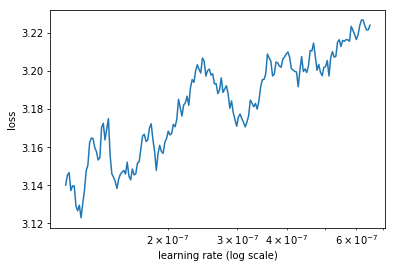

In [28]:
learner.lr_plot()

In [29]:
learner.autofit(0.001, 2)



begin training using triangular learning rate policy with max lr of 0.001...


/usr/local/lib/python3.6/dist-packages/keras/engine/training_generator.py:47: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/2
938/938 [==============================] - 240s 256ms/step - loss: 0.5585 - acc: 0.8259 - val_loss: 0.0161 - val_acc: 0.9952
Epoch 2/2
938/938 [==============================] - 241s 257ms/step - loss: 0.1369 - acc: 0.9592 - val_loss: 0.0387 - val_acc: 0.9874


In [30]:
loss, acc = learner.model.evaluate_generator(val_data, steps=len(val_data))
print('final loss:%s, final score:%s' % (loss, acc))



final loss:0.040114722952339796, final score:0.9865


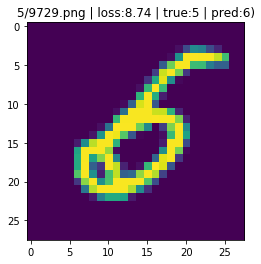

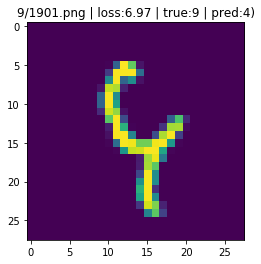

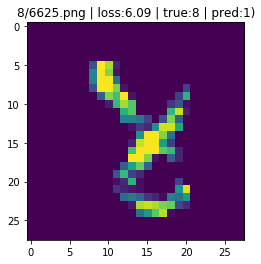

In [31]:
learner.view_top_losses(n=3, preproc=preproc)